### Import Libraries

In [109]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# modeling imports
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV,ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
import statsmodels.api as sm

#set_style
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

#### Load data

In [110]:
#read in cleaned data file
ames_clean = pd.read_csv('../datasets/skew_eval.csv')

In [111]:
#shape of date file
ames_clean.shape

(2033, 31)

In [112]:
#columns in data file
ames_clean.columns

Index(['price_log', 'age', 'neighborhood_order', 'local_conditions',
       'was_remodeled', 'overall_qual', 'house_style_condensed_1.5',
       'house_style_condensed_2.0', 'exter_qual', 'external_feature',
       'bldg_type_TwnhsE', 'bldg_type_Twnhs', 'bldg_type_2fmCon',
       'is_hip_roof', 'mas_vnr_area', 'functional', 'lot_frontage', 'lot_area',
       'developed_outside_sf', 'garage_fin*sqft', 'garage_cars', 'paved_drive',
       'bsmt_qual', 'bsmt_type*sf_all', 'bsmt_exposure', 'heating_qc',
       'kitchen_qual', 'fireplace_qu', 'quality_above_sqft', 'totrms_abvgrd',
       'room_size'],
      dtype='object')

#### This is the benchmark MRSE, based on an average of saleprice for all houses

In [5]:
#convert price_log back to dollars
ames_clean['price_norm'] = np.exp(ames_clean['price_log'])
#take the average of price log
ames_clean['y_niave'] = ames_clean['price_norm'].mean()

In [6]:
MRSE = metrics.mean_squared_error(y_true=ames_clean['price_norm'], y_pred=ames_clean['y_niave'] )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 73422.04.


### Prepare data for modeling

In [7]:
ames_clean.columns

Index(['price_log', 'age', 'neighborhood_order', 'local_conditions',
       'was_remodeled', 'overall_qual', 'house_style_condensed_1.5',
       'house_style_condensed_2.0', 'exter_qual', 'external_feature',
       'bldg_type_TwnhsE', 'bldg_type_Twnhs', 'bldg_type_2fmCon',
       'is_hip_roof', 'mas_vnr_area', 'functional', 'lot_frontage', 'lot_area',
       'developed_outside_sf', 'garage_fin*sqft', 'garage_cars', 'paved_drive',
       'bsmt_qual', 'bsmt_type*sf_all', 'bsmt_exposure', 'heating_qc',
       'kitchen_qual', 'fireplace_qu', 'quality_above_sqft', 'totrms_abvgrd',
       'room_size', 'price_norm', 'y_niave'],
      dtype='object')

In [8]:
#create X and y variables
X = ames_clean.drop(columns=['price_log','price_norm', 'y_niave'])
y = ames_clean['price_log']

In [9]:
#split into training and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2, train_size = .8)

#### Linear Regression Model, not scaled

In [10]:
#Instantiate, fit and score 
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)
print(f' Unscaled Linear Regression training R^2 score: {round(lr.score(X=X_train, y=y_train),4)}')
print(f' Unscaled Linear Regression test R^2 score: {round(lr.score(X_test, y_test),4)}')

 Unscaled Linear Regression training R^2 score: 0.8903
 Unscaled Linear Regression test R^2 score: 0.9007


In [11]:
X = sm.add_constant(X)
ols = sm.OLS(y, X).fit()

In [12]:
#let's take a quick look at the summary stats of our ordinary least squares
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     555.6
Date:                Sun, 20 Dec 2020   Prob (F-statistic):               0.00
Time:                        15:02:59   Log-Likelihood:                 1244.7
No. Observations:                2033   AIC:                            -2427.
Df Residuals:                    2002   BIC:                            -2253.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         9.9342      0.057    175.825      0.000       9.823      10.045
age                          -0.0008      0.000     -4.119      0.000      -0.001      -0.000
neighborhood_order            0.0415      0.005      8.597      0.000       0.032       0.051
local_conditions              0.0408      0.008      5.381      0.000       0.026       0.056
was_remodeled                 0.0097      0.007      1.392      0.164      -0.004       0.023
overall_qual                  0.0713      0.004     17.268      0.000       0.063       0.079
house_style_condensed_1.5    -0.0070      0.010     -0.670      0.503      -0.027       0.013
house_style_condensed_2.0    -0.0536      0.009     -5.946      0.000      -0.071      -0.036
exter_qual                    0.0117      0.009      1.292      0.197      -0.006       0.029
external_feature              0.0028      0.002      1.482      0.139      -0.001       0.006
bldg_type_TwnhsE             -0.0596      0.013     -4.445      0.000      -0.086      -0.033
bldg_type_Twnhs              -0.0936      0.019     -4.894      0.000      -0.131      -0.056
bldg_type_2fmCon             -0.0240      0.021     -1.165      0.244      -0.064       0.016
is_hip_roof                   0.0105      0.008      1.287      0.198      -0.006       0.026
mas_vnr_area              -8.022e-06   2.08e-05     -0.385      0.700   -4.89e-05    3.28e-05
functional                    0.0842      0.013      6.668      0.000       0.059       0.109
lot_frontage                  0.0006      0.000      3.017      0.003       0.000       0.001
lot_area                   3.417e-06   5.29e-07      6.457      0.000    2.38e-06    4.45e-06
developed_outside_sf          0.0001   2.14e-05      5.428      0.000    7.41e-05       0.000
garage_fin*sqft           -2.382e-06   8.35e-06     -0.285      0.775   -1.88e-05     1.4e-05
garage_cars                   0.0290      0.006      4.683      0.000       0.017       0.041
paved_drive                   0.0668      0.006     10.532      0.000       0.054       0.079
bsmt_qual                     0.0200      0.005      4.005      0.000       0.010       0.030
bsmt_type*sf_all           2.175e-05   1.48e-06     14.709      0.000    1.89e-05    2.47e-05
bsmt_exposure                 0.0077      0.003      2.285      0.022       0.001       0.014
heating_qc                    0.0310      0.004      7.959      0.000       0.023       0.039
kitchen_qual                  0.0352      0.007      4.964      0.000       0.021       0.049
fireplace_qu                  0.0109      0.002      5.413      0.000       0.007       0.015
quality_above_sqft         7.242e-05   2.58e-05      2.808      0.005    2.18e-05       0.000
totrms_abvgrd                 0.0468      0.006      7.570      0.000      

#### Linear Regression Model, scaled (all models here on out are scaled)

In [13]:
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [14]:
lr_stan = LinearRegression()
lr_stan.fit(Z_train, y_train)
print(f' Scaled Linear Regression training R^2 score: {round(lr_stan.score(Z_train, y_train),4)}')
print(f' Scaled Linear Regression test R^2 score: {round(lr_stan.score(Z_test, y_test),4)}')

 Scaled Linear Regression training R^2 score: 0.8903
 Scaled Linear Regression test R^2 score: 0.9007


In [15]:
#convert predictions back to dollars
y_preds_log = lr_stan.predict(Z_train)
y_preds_dollar = np.exp(y_preds_log)

#convert training back to dollars for chart
y_train_dollar = np.exp(y_train)

#convert y back to dollars for chart
y_dollar = np.exp(y)

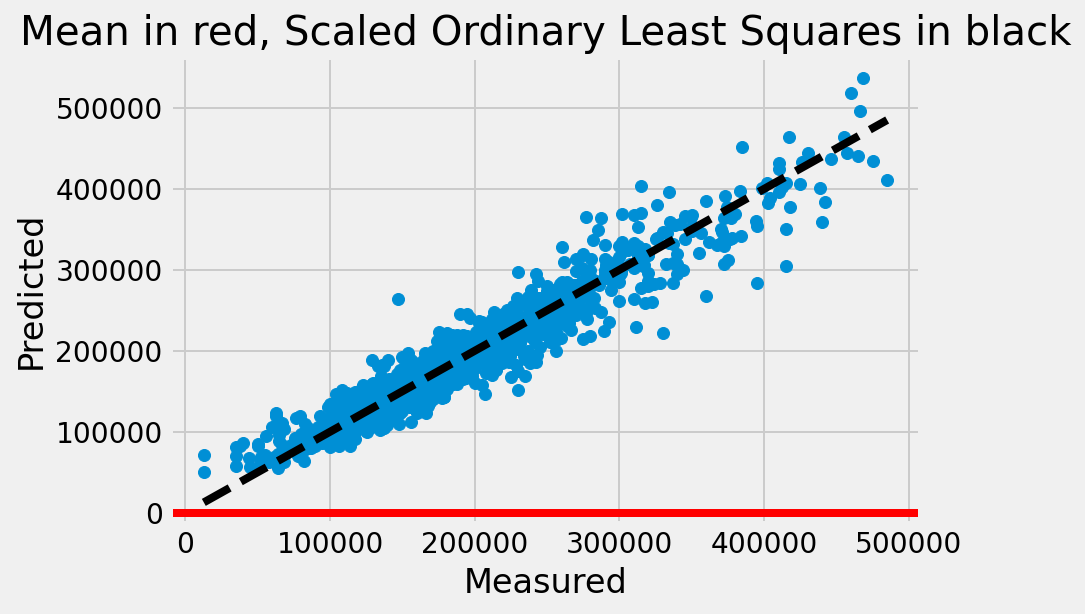

In [16]:
fig, ax = plt.subplots()
ax.scatter(y_train_dollar, y_preds_dollar)
ax.plot([y_dollar.min(), y_dollar.max()],[y_dollar.min(),y_dollar.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Scaled Ordinary Least Squares in black")
plt.show()

In [17]:
MRSE = metrics.mean_squared_error(y_true=y_train_dollar, y_pred=y_preds_dollar )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 20364.36.


#### RidgeCV Regression

In [18]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);

In [19]:
# Here is the optimal value of alpha
ridge_cv.alpha_

46.4158883361278

In [20]:
print(f' RidgeCV Regression training R^2 score: {round(ridge_cv.score(Z_train, y_train),4)}')
print(f' RidgeCV Regression test R^2 score: {round(ridge_cv.score(Z_test, y_test),4)}')

 RidgeCV Regression training R^2 score: 0.8901
 RidgeCV Regression test R^2 score: 0.9014


In [21]:
ridge_preds_log = ridge_cv.predict(Z_train)

In [22]:
#convert predictions back to dollars
y_preds_log_ridge = ridge_cv.predict(Z_train)
y_preds_ridge_dollar = np.exp(y_preds_log_ridge)

#convert training back to dollars for chart
y_train_ridge_dollar = np.exp(y_train)

#convert y back to dollars for chart
y_dollar = np.exp(y)

In [23]:
MRSE = metrics.mean_squared_error(y_true=y_train_ridge_dollar, y_pred=y_preds_ridge_dollar )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 20202.78.


#### LassoCV Regression

In [24]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 3, 500)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=10000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

#best found alpha
lasso_cv.alpha_

0.0011171106505048242

In [25]:
print(f' LassoCV Regression training R^2 score: {round(lasso_cv.score(Z_train, y_train),4)}')
print(f' LassoCV Regression test R^2 score: {round(lasso_cv.score(Z_test, y_test),4)}')

 LassoCV Regression training R^2 score: 0.8901
 LassoCV Regression test R^2 score: 0.9015


In [26]:
#convert predictions back to dollars
y_preds_log_lasso = lasso_cv.predict(Z_train)
y_preds_lasso_dollar = np.exp(y_preds_log_lasso)

#convert training back to dollars for chart
y_train_lasso_dollar = np.exp(y_train)

#convert y back to dollars for chart
y_dollar = np.exp(y)

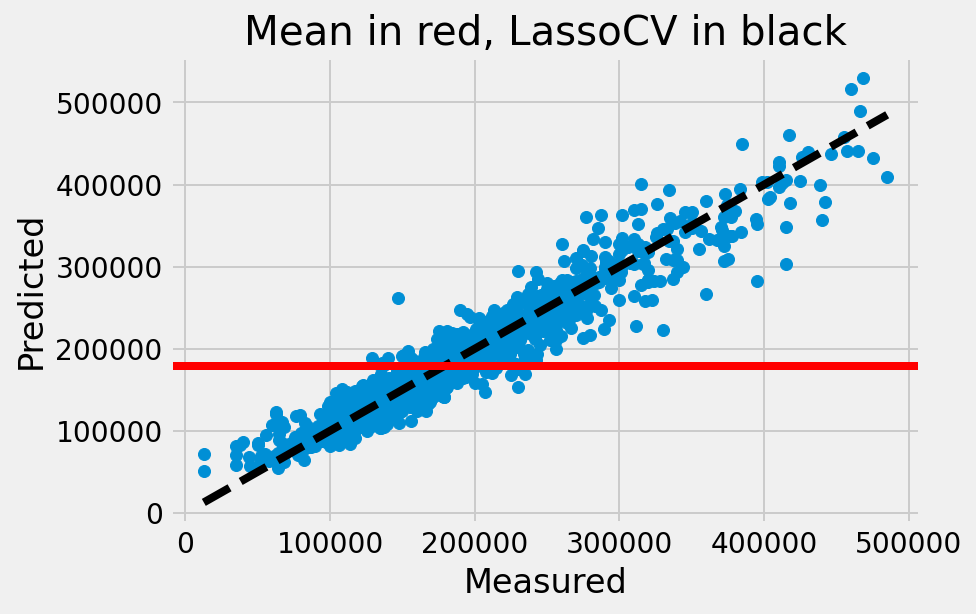

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_train_lasso_dollar, y_preds_lasso_dollar)
ax.plot([y_dollar.min(), y_dollar.max()],[y_dollar.min(),y_dollar.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train_lasso_dollar.mean(),c='red')
plt.title("Mean in red, LassoCV in black")
plt.show()

In [28]:
MRSE = metrics.mean_squared_error(y_true=y_train_lasso_dollar, y_pred=y_preds_lasso_dollar )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 20310.18.


###### Models utilizing Pipeline and Gridsearch. A glance at Lasso, Ridge and Elastic net.
##### Pipeline saves time by executing scaling, model initiation and polynomial feature creation.
##### Gridsearch searches for the best values in a given list of parameters

In [29]:
#create pipeline for ridge model
pipe_ridge = Pipeline([
    ('sc', StandardScaler()),
    ('ridge', Ridge())
])

In [30]:
#create parameters for gridsearch
ridge_params1 = {'ridge__alpha':np.logspace(-1, 3, 500),
               'ridge__max_iter':[10000]}

In [31]:
#apply pipeline and gridsearch to GridSearchCV
pipe_ridge_gridsearch = GridSearchCV(
                                pipe_ridge, 
                                param_grid=ridge_params1,
                            )

In [32]:
#fit best result from grid search
pipe_ridge_gridsearch.fit(X_train, y_train)
pipe_ridge_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('ridge', Ridge(alpha=41.04180502904709, max_iter=10000))])

In [33]:
pipe_ridge_gridsearch.best_score_

0.882921596856618

In [34]:
#convert predictions back to dollars
y_preds_log_ridge_gridsearch = pipe_ridge_gridsearch.predict(X_train)
y_preds_ridge_dollar = np.exp(y_preds_log_ridge_gridsearch)

#convert training back to dollars for chart
y_train_ridge_dollar = np.exp(y_train)

#convert y back to dollars for chart
y_dollar = np.exp(y)

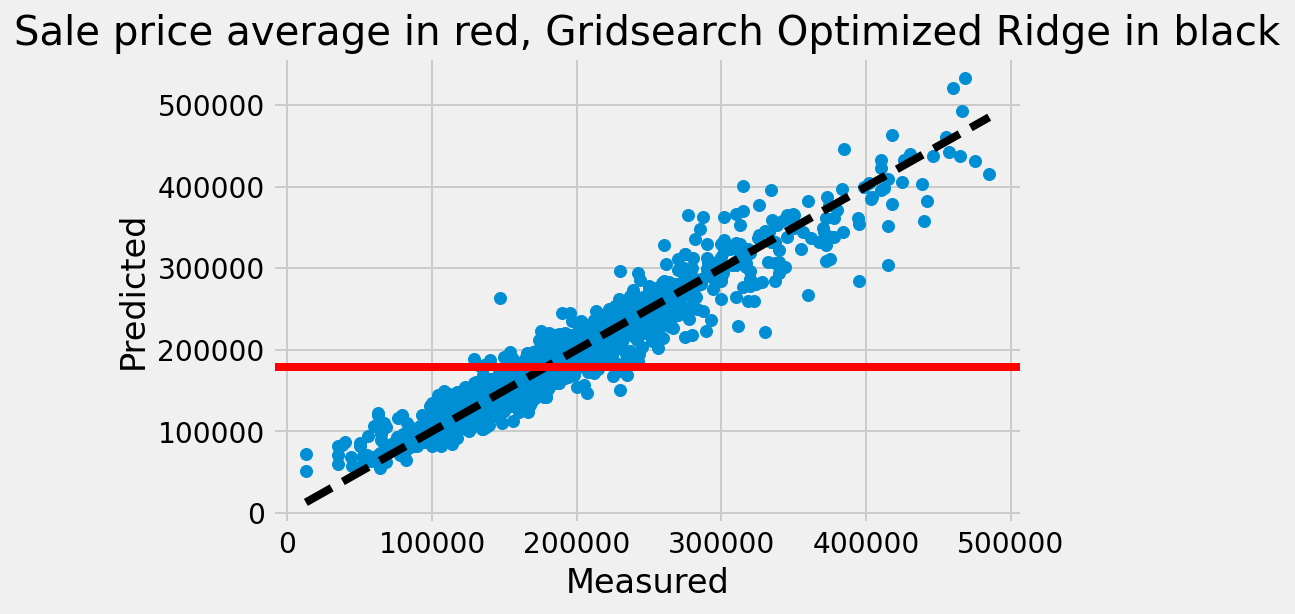

In [35]:
fig, ax = plt.subplots()
ax.scatter(y_train_ridge_dollar, y_preds_ridge_dollar)
ax.plot([y_dollar.min(), y_dollar.max()],[y_dollar.min(),y_dollar.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train_lasso_dollar.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized Ridge in black")
plt.show()

In [36]:
MRSE = metrics.mean_squared_error(y_true=y_train_ridge_dollar, y_pred=y_preds_ridge_dollar )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 20217.36.


#### Lasso Model

In [37]:
lasso_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('lassocv', Lasso())
])

In [80]:
lasso_params = {'lassocv__alpha':[.001],#np.logspace(0, 2, 1000),
               'lassocv__max_iter':[10000]}
#                ,'lassocv__warm_start':[True]}

In [81]:
lasso_pipe_gridsearch = GridSearchCV(lasso_pipe, 
                               param_grid=lasso_params)

In [82]:
X_train.head()

,age,neighborhood_order,local_conditions,was_remodeled,overall_qual,house_style_condensed_1.5,house_style_condensed_2.0,exter_qual,external_feature,bldg_type_TwnhsE,...,paved_drive,bsmt_qual,bsmt_type*sf_all,bsmt_exposure,heating_qc,kitchen_qual,fireplace_qu,quality_above_sqft,totrms_abvgrd,room_size
2012,110,1,2,1,4,1,0,3,6,0,...,0,3,0.0,2,4,3,0,1178,7,168.285714
471,77,3,2,1,4,1,0,3,6,0,...,2,3,1134.0,1,5,4,3,1755,7,250.714286
744,30,3,2,0,7,1,0,4,8,0,...,2,5,6030.0,4,3,3,2,1083,5,216.600000
1112,81,3,2,1,5,0,0,3,6,0,...,2,3,1276.0,2,3,3,0,1422,6,237.000000
2019,32,2,2,0,5,0,0,3,7,0,...,2,3,3810.0,1,3,3,2,894,5,178.800000


In [83]:
y_train.head()

2012    11.540307
471     12.144197
744     12.055250
1112    11.824080
2019    11.867097
Name: price_log, dtype: float64

In [84]:
lasso_pipe_gridsearch.fit(X_train, y_train)
lasso_pipe_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('lassocv', Lasso(alpha=0.001, max_iter=10000))])

In [85]:
print(f'LassoCV R^2 Score: {round(lasso_pipe_gridsearch.best_score_,4)}')

LassoCV R^2 Score: 0.8829


In [86]:
#convert predictions back to dollars
y_preds_log_lasso_gridsearch = lasso_pipe_gridsearch.predict(X_train)
y_preds_lasso_dollar = np.exp(y_preds_log_lasso_gridsearch)

#convert training back to dollars for chart
y_train_lasso_dollar = np.exp(y_train)

#convert y back to dollars for chart
y_dollar = np.exp(y_train)

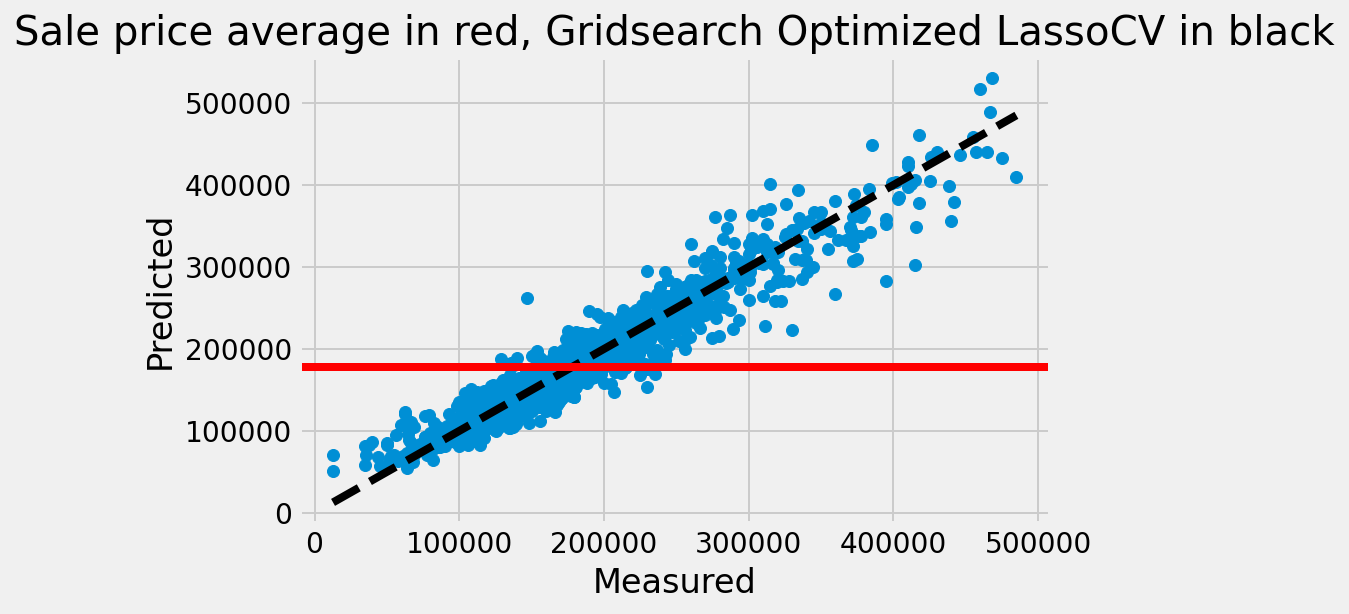

In [87]:
fig, ax = plt.subplots()
ax.scatter(y_train_lasso_dollar, y_preds_lasso_dollar)
ax.plot([y_dollar.min(), y_dollar.max()],[y_dollar.min(),y_dollar.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train_lasso_dollar.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized LassoCV in black")
plt.show()

In [88]:
y_train_lasso_dollar.mean()

178505.12730627306

In [89]:
MRSE = metrics.mean_squared_error(y_true=y_train_lasso_dollar, y_pred=y_preds_lasso_dollar )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 20312.45.


## Lasso Coef_ Evaluation
#### Fit lassocv model with gridsearch parameters in order to look at coeficients

In [90]:
lasso_sc = StandardScaler()
lasso_Z_train = lasso_sc.fit_transform(X_train)
lasso_Z_test = lasso_sc.fit_transform(X_test)

In [91]:
lasso_coef_eval = Lasso(alpha = .001, max_iter=5000)

In [92]:
print(lasso_Z_train.shape)
print(y_train.shape)

(1626, 30)
(1626,)


In [93]:
lasso_coef_eval.fit(lasso_Z_train, y_train)
print(f'Lasso R^2 Cross Validated Score: {round(cross_val_score(lasso_coef_eval, lasso_Z_train, y_train).mean(),4)}') 

Lasso R^2 Cross Validated Score: 0.8829


In [94]:
np.exp(lasso_coef_eval.intercept_)

165061.85495174548

In [95]:
project_model = pd.DataFrame(list(zip(X_train.columns, np.exp(lasso_coef_eval.coef_))))
project_model

,0,1
0,age,0.975294
1,neighborhood_order,1.047456
2,local_conditions,1.016184
3,was_remodeled,1.003958
4,overall_qual,1.104193
5,house_style_condensed_1.5,1.000000
6,house_style_condensed_2.0,0.975567
7,exter_qual,1.005669
8,external_feature,1.006419
9,bldg_type_TwnhsE,0.987037


#### Lasso Model with polynomial features

In [99]:
lasso_poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)), #uncomment me to release to power
    ('sc', StandardScaler()),
    ('lassocv', Lasso())
])

lasso_poly_params = {'lassocv__alpha':[.001],# np.logspace(1, 2.5, 100),
               'lassocv__max_iter':[10000],
                 'lassocv__tol':[.005]}

pipe_gridsearch = GridSearchCV(lasso_poly_pipe, 
                                param_grid=lasso_poly_params,)


In [100]:
pipe_gridsearch.fit(X_train, y_train)
pipe_gridsearch.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures()), ('sc', StandardScaler()),
                ('lassocv', Lasso(alpha=0.001, max_iter=10000, tol=0.005))])

In [101]:
print(f'LassoCV With Polynomial Features R^2 Score: {round(pipe_gridsearch.best_score_,4)}')

LassoCV With Polynomial Features R^2 Score: 0.8909


In [102]:
y_preds_lassopoly = pipe_gridsearch.predict(X_train)

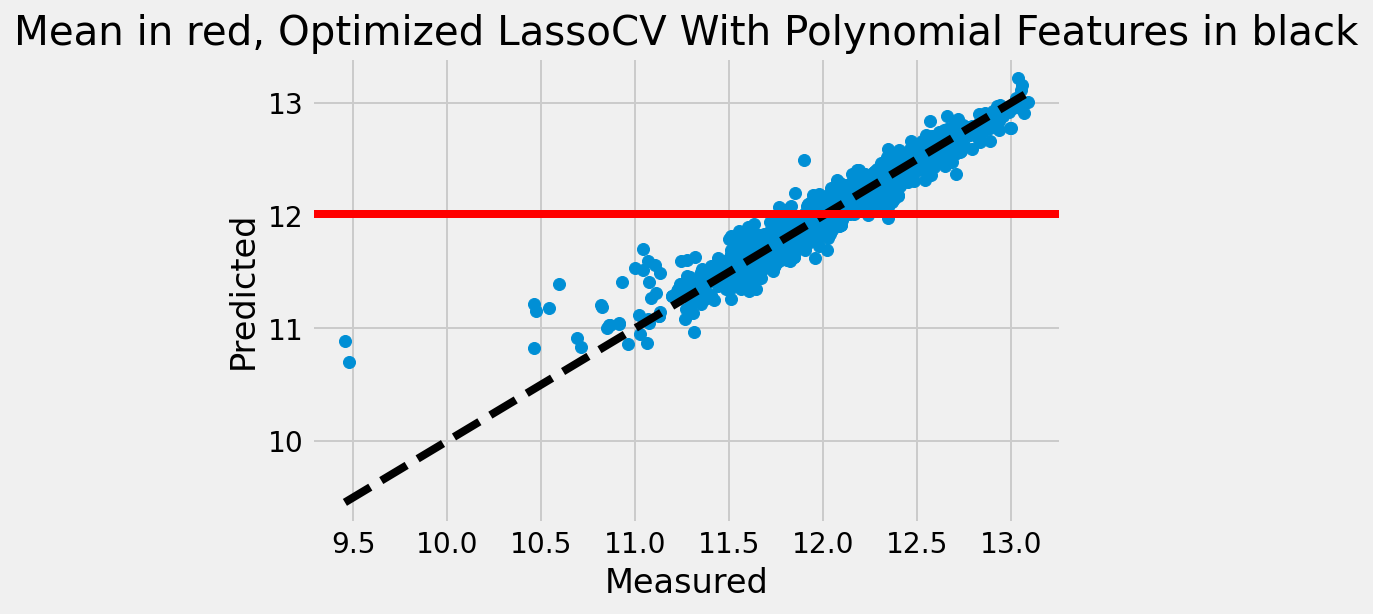

In [103]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_preds_lassopoly)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Optimized LassoCV With Polynomial Features in black")
plt.show()

In [104]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds_lassopoly )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 0.12.


In [106]:
#convert predictions back to dollars
y_preds_log_lassopoly = lasso_pipe_gridsearch.predict(X_train)
y_preds_lassopoly_dollar = np.exp(y_preds_log_lassopoly)

#convert training back to dollars for chart
y_train_lasso_dollar = np.exp(y_train)

#convert y back to dollars for chart
y_dollar = np.exp(y_train)

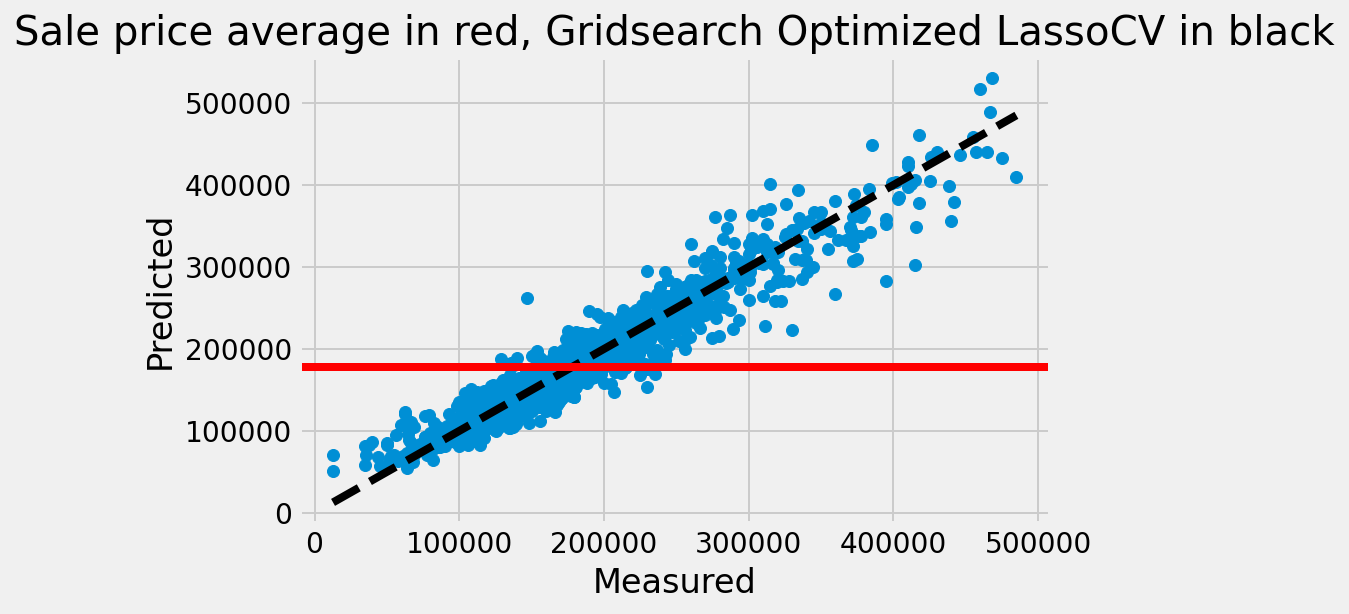

In [107]:
fig, ax = plt.subplots()
ax.scatter(y_train_lasso_dollar, y_preds_lassopoly_dollar)
ax.plot([y_dollar.min(), y_dollar.max()],[y_dollar.min(),y_dollar.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train_lasso_dollar.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized LassoCV in black")
plt.show()

In [108]:
MRSE = metrics.mean_squared_error(y_true=y_train_lasso_dollar, y_pred=y_preds_lassopoly_dollar )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 20312.45.


#### Elastic Net Model

In [61]:
pipe_mario = Pipeline([
            #('poly', PolynomialFeatures(degree=2)),
            ('sc', StandardScaler()),
            ('elasticnet', ElasticNet())
                        ])

In [62]:
parameters_mario = {'elasticnet__alpha': np.logspace(-1, 4, 500),
                      #'elasticnet__normalize': [True, False],
                      'elasticnet__selection': ['cyclic', 'random'],
                        'elasticnet__max_iter': [10000],
                        'elasticnet__warm_start': [True]
                        #'elasticnet__tol': [.1]
                       }

In [63]:
elastic_net_model = GridSearchCV(
                pipe_mario, 
           param_grid= parameters_mario)
elastic_net_model.fit(X_train, y_train)
elastic_net_model.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.1, max_iter=10000, selection='random',
                            warm_start=True))])

In [64]:
print(f'ElasticNet Model R^2 Score: {round(elastic_net_model.best_score_,4)}')

ElasticNet Model R^2 Score: 0.8938


In [65]:
y_preds_en = elastic_net_model.predict(X_train)

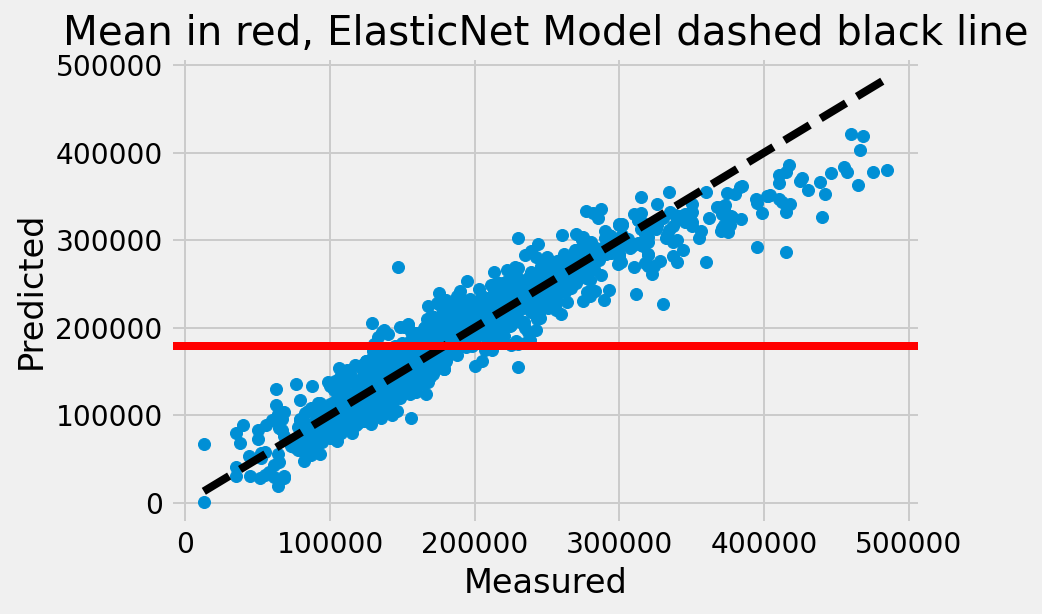

In [66]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_preds_en)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, ElasticNet Model dashed black line")
plt.show()

In [67]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds_en )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 22852.09.
